<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Mahdi Shafiee<br>
   **Student ID**: 99109409<br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

First we make our dataset using "make_regression" function from "sklearn" library:

In [1]:
import numpy as np
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=50000, n_features=8, noise=10)

Now we transform y from an array to a n by 1 matrix and normalize it:

In [3]:
y = y[:, np.newaxis]

Then, we add the bias feature by adding a column of ones to the matrix X:

In [4]:
ones = np.ones([len(X), 1])
X = np.hstack((ones, X))

For minimizing the Loss Function, we will use gradient descent. Also both Lasso regularization and Ridge regularization will be tested.

In [5]:
def ridge_cost(X, y, w, l):
    m = len(X)
    error = y - np.dot(X, w)
    return 1 / (2 * m) * np.dot(error.T, error) + l / (2 * m) * np.dot(w.T, w)


def ridge_gradient(X, y, w, l):
    m = len(X)
    error = y - np.dot(X, w)
    return -1 / m * np.dot(X.T, error) + l * w / m


def lasso_cost(X, y, w, l):
    m = len(X)
    error = y - np.dot(X, w)
    return 1 / (2 * m) * np.dot(error.T, error) + l / m * sum(abs(w))


def lasso_gradient(X, y, w, l):
    m = len(X)
    error = y - np.dot(X, w)
    return -1 / m * np.dot(X.T, error) + l * np.sign(w) / m

Here the initial values of costs and gradients are shown:

In [6]:
w = np.random.rand(len(X[0]), 1)
l = 0
print("initial cost:", ridge_cost(X, y, w, l)[0][0])

initial cost: 13978.57392553157


First, regularization factor $\lambda$ is set to $0$ and step length is set to $0.01$ and number of steps is set to $1000$.

In [7]:
delta = 0.01
step_number = 1000

Gradient Descent algorithm (without regularization) has been implemented below.
As we run Gradient Descent, cost at each step is stored:

In [8]:
step = []
costs = []
def ridge_gradient_descent(X, y, w, l, delta, step_number):
    for i in range(step_number):
        w = w - delta * ridge_gradient(X, y, w, l)
        step.append(i)
        costs.append(ridge_cost(X, y, w, l)[0])
    return w


def lasso_gradient_descent(X, y, w, l, delta, step_number):
    for i in range(step_number):
        w = w - delta * lasso_gradient(X, y, w, l)
        step.append(i)
        costs.append(ridge_cost(X, y, w, l)[0])
    return w

In [9]:
new_w = ridge_gradient_descent(X, y, w, l, delta, step_number)
print("optimum w (using gradient descent):")
print(new_w)
print()
print("final cost:", ridge_cost(X, y, new_w, l)[0][0])

optimum w (using gradient descent):
[[-8.07282829e-02]
 [ 7.14915883e+01]
 [ 9.51576020e+01]
 [ 1.73132268e+01]
 [ 3.69429117e+01]
 [ 7.13910370e+01]
 [ 6.75006394e+01]
 [ 1.84389903e+01]
 [ 5.45183260e+01]]

final cost: 50.191878724868396


To check our implementation, closed form answer of linear regression is shown below. Fortunately, both answers are pretty similar:

In [10]:
p = np.linalg.inv(np.dot(X.T, X))
q = np.dot(X.T, y)
print("optimum w (using closed form answer):")
print(np.dot(p, q))
print(ridge_cost(X, y, np.dot(p, q), l)[0][0])

optimum w (using closed form answer):
[[-8.02982301e-02]
 [ 7.14952114e+01]
 [ 9.51630583e+01]
 [ 1.73139590e+01]
 [ 3.69450804e+01]
 [ 7.13948318e+01]
 [ 6.75035558e+01]
 [ 1.84393660e+01]
 [ 5.45202739e+01]]
50.191841898125006


As the cost-step plot indicates, step number of 5000 is good enough, because the algorithm has pretty much converged.

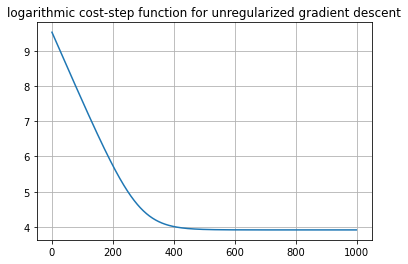

In [11]:
import matplotlib.pyplot as plt
plt.plot(step, np.log(costs))
plt.title("logarithmic cost-step function for unregularized gradient descent")
plt.grid()
plt.show()

In the next step, we compare different amounts of regularization factor for Ridge Regression and Lasso Regression. For calculating best regularization factor, K-fold Cross Validation is used.
As results show below, our model doesn't suffer from overfitting in the first place, so increasing $\lambda$ reduces the error negligibly.<br>
As we see below, the least error for test data is obtained when $\lambda$ is approximately equal to 10.

In [27]:
m = len(X) // 5 * 4
X_train = X[:m, :]
y_train = y[:m, :]
X_test = X[m:, :]
y_test = y[m:, :]

delta = 0.01
step_number = 1000

print("ridge regularization:\n")

l = 0
w_new = ridge_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 0:     ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 5
w_new = ridge_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 5:     ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 10
w_new = ridge_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 10:    ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 15
w_new = ridge_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 15:    ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 20
w_new = ridge_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 20:    ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

print("\nbest lambda: 10")

ridge regularization:

error for lambda = 0:      50.752701816426196
error for lambda = 5:      50.75191460124235
error for lambda = 10:     50.751570669408146
error for lambda = 15:     50.75166968579234
error for lambda = 20:     50.75221131551631

best lambda: 10


As we have shown below, for this dataset, lasso regularization doesn't work very well. Best regularization factor is nearly zero.

In [29]:
m = len(X) // 5 * 4
X_train = X[:m, :]
y_train = y[:m, :]
X_test = X[m:, :]
y_test = y[m:, :]

delta = 0.01
step_number = 1000

print("lasso regularization:\n")

l = 0
w_new = lasso_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 0:      ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 1
w_new = lasso_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 1:      ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 2
w_new = lasso_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 2:      ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 3
w_new = lasso_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 3:      ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

l = 4
w_new = lasso_gradient_descent(X_train, y_train, w, l, delta, step_number)
print("error for lambda = 4:      ", ridge_cost(X_test, y_test, w_new, 0)[0][0])

print("\nbest lambda: 0")

lasso regularization:

error for lambda = 0:       50.752701816426196
error for lambda = 1:       50.752707081679354
error for lambda = 2:       50.75271235241111
error for lambda = 3:       50.75271762862149
error for lambda = 4:       50.752722910310425

best lambda: 0
